
# 2.2-kW PMSM

This example simulates observer-based V/Hz control of a 2.2-kW PMSM drive.


In [ ]:
pip install motulator

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 2.2 MB/s eta 0:00:00


In [ ]:
import numpy as np

from motulator.drive import model
import motulator.drive.control.sm as control
from motulator.drive.utils import (
    BaseValues, NominalValues, plot, Sequence, SynchronousMachinePars)

Compute base values based on the nominal values (just for figures).



In [ ]:
nom = NominalValues(U=370, I=4.3, f=75, P=2.2e3, tau=14)
base = BaseValues.from_nominal(nom, n_p=3)

Configure the system model.



In [ ]:
mdl_par = SynchronousMachinePars(
    n_p=3, R_s=3.6, L_d=.036, L_q=.051, psi_f=.545)
machine = model.SynchronousMachine(mdl_par)
mechanics = model.StiffMechanicalSystem(J=.015)
converter = model.VoltageSourceConverter(u_dc=540)
mdl = model.Drive(converter, machine, mechanics)

Configure the control system.



In [ ]:
par = mdl_par  # Assume accurate machine model parameter estimates
cfg = control.ObserverBasedVHzControlCfg(par, max_i_s=1.5*base.i)
ctrl = control.ObserverBasedVHzControl(par, cfg, T_s=250e-6)
#ctrl.rate_limiter = control.RateLimiter(2*np.pi*120)

Set the speed reference and the external load torque.



In [ ]:
# Speed reference
times = np.array([0, .125, .25, .375, .5, .625, .75, .875, 1])*8
values = np.array([0, 0, 1, 1, 0, -1, -1, 0, 0])*base.w
ctrl.ref.w_m = Sequence(times, values)
# External load torque
times = np.array([0, .125, .125, .875, .875, 1])*8
values = np.array([0, 0, 1, 1, 0, 0])*nom.tau
mdl.mechanics.tau_L = Sequence(times, values)

Create the simulation object and simulate it.



In [ ]:
sim = model.Simulation(mdl, ctrl)
sim.simulate(t_stop=8)

Plot results in per-unit values. By omitting the argument `base` you can plot
the results in SI units.



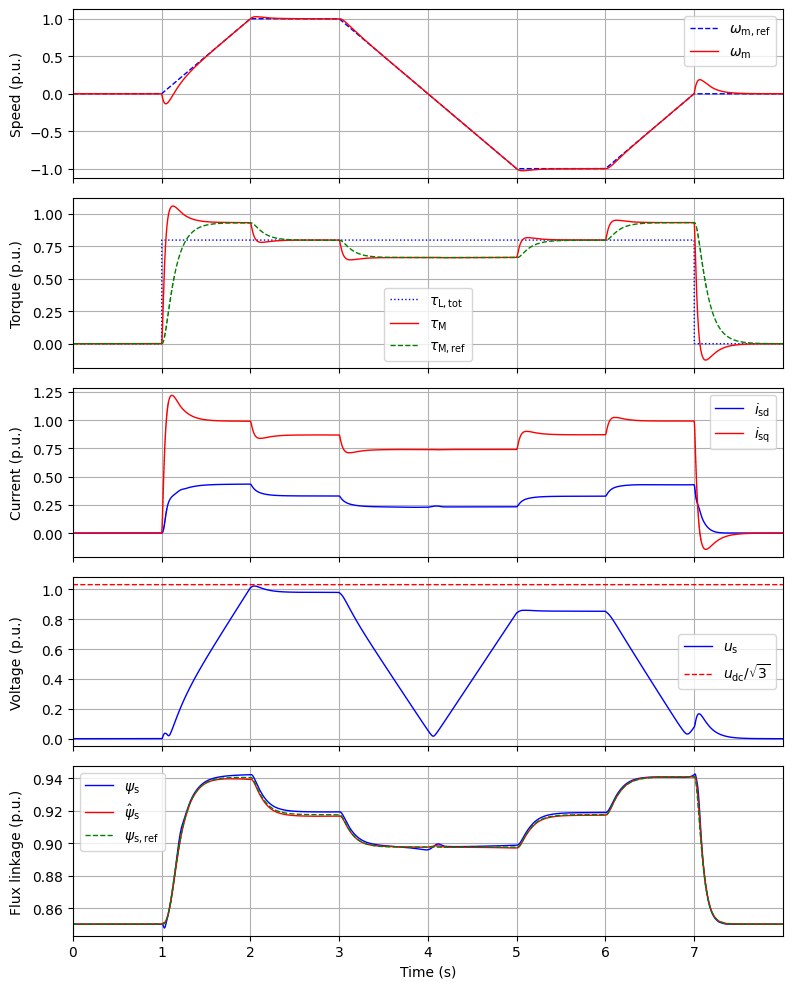

In [ ]:
plot(sim, base)